# Machine learning lab

### Student id: \<02404395>
### Name: \<Stefanos Lucena>

## Outline and instructions

Complete the coding assignments below and answer all multiple choice questions in the notebook. You will be using the python notebook (`jupyter`) and `scikit-learn` for this.

Start writing your own code below the "**# YOUR CODE HERE**" comments for each assignment and remove the "raise NotImplementedError()". Don't forget to reply to the questions. 

Please do not use tools like Google colab, Visual studio code, Spyder, etc. Sometimes these tools will corrupt the notebook leading to a failure in the automatic grading system (and a 0 grade). You are free to use these tools while solving the assignment, but copy the answers to a fresh assignment notebook using jupyter notebook for submission to Ufora.

The recommended Python version is >= 3.9. The recommended package versions are listed below:

- scikit-learn >= 1.0.0
- numpy >= 1.21.0
- matplotlib >= 3.5.0

## Submission instructions:

1. Do not change function definitions or other code that is provided to you. Some cells of the notebook cannot be modified and will be clearly marked as such.
2. Do not submit .zip files or other archives. Only submit the notebook, do not submit additional files such as data files which were provided to you.
3. Fill in your name and student id in the notebook in the top cell.

## Additional information

Although there are many Python packages for Gaussian processes, the algorithms in this lab session are implemented from scratch so that all implementation details are visible. You do not have to implement anything yourself as all questions in this lab session are multiple choice and focussed on comprehension. Make sure you understand the theory slides before answering the questions as the questions are theoretical. Use the provided code as an additional aid to improve your understanding of the algorithms from the course. After the lab session, you can use the code and experiment with it.

Note that there might be multiple correct answers. In that case, write down all answers in the same string. e.g.:

Which of the following statements are correct?

- A: correct
- B: incorrect
- C: correct
- D: incorrect

answer_question_0 = 'ac'

Please do not add any additional remarks as the lab is automatically graded.

## Before you hand in

Restart the kernel and do a complete run before turning in (Kernel -> Restart & Run all)

 **Make sure all cells were evaluated successfully!**


-----------------

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Machine-learning-lab" data-toc-modified-id="Machine-learning-lab-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Machine learning lab</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Student-id:-
" data-toc-modified-id="Student-id:-
-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Student id: 
</a></span></li><li><span><a href="#Name:-
" data-toc-modified-id="Name:-
-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Name: 
</a></span></li></ul></li><li><span><a href="#Outline-and-instructions" data-toc-modified-id="Outline-and-instructions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Outline and instructions</a></span><ul class="toc-item"></ul></li><li><span><a href="#Submission-instructions:" data-toc-modified-id="Submission-instructions:-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Submission instructions:</a></span><ul class="toc-item"><li><span><a href="#Additional-information" data-toc-modified-id="Additional-information-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Additional information</a></span></li></ul></li><li><span><a href="#Tips" data-toc-modified-id="Tips-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Tips</a></span></li></ul></li><li><span><a href="#Gaussian-Processes" data-toc-modified-id="Gaussian-Processes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Gaussian Processes</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Specifying-a-Gaussian-process" data-toc-modified-id="Specifying-a-Gaussian-process-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Specifying a Gaussian process</a></span></li><li><span><a href="#Hyperparameters" data-toc-modified-id="Hyperparameters-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Hyperparameters</a></span></li><li><span><a href="#Noisy-observations" data-toc-modified-id="Noisy-observations-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Noisy observations</a></span></li><li><span><a href="#Gaussian-Process-based-optimisation" data-toc-modified-id="Gaussian-Process-based-optimisation-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Gaussian Process-based optimisation</a></span></li></ul></li></ul></div>

# Gaussian Processes
## Introduction

During the course, we have seen various parametric machine learning models where the information represented by the training data is encoded by a fixed amount of parameters, e.g., the weights of a neural network. For making predictions the training data is not required, but it makes strong assumptions on the data and the complexity of the model, i.e. that it can be fit with these parameters.

The **Gaussian Process** model is a non-parametric machine learning algorithm. The only assumption on the data is that all sub-sets of data points are *jointly Normal distributed*.

This can be illustrating by considering the power consumption in a typical household. The measurement of power consumption can be modeled as a sample drawn from a Gaussian prior $\mathcal{N}(\mu, \sigma^2)$, where $\mu$ represents the expected power consumption level (e.g., in kilowatt, kW) for the household at a specific time, and $\sigma^2$ represents the variance, capturing the typical fluctuations around this value due to factors such as appliance usage patterns, family activities, and seasonal variations.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import multivariate_normal, norm
from mpl_toolkits.mplot3d import Axes3D

Sample = [0.59777085]


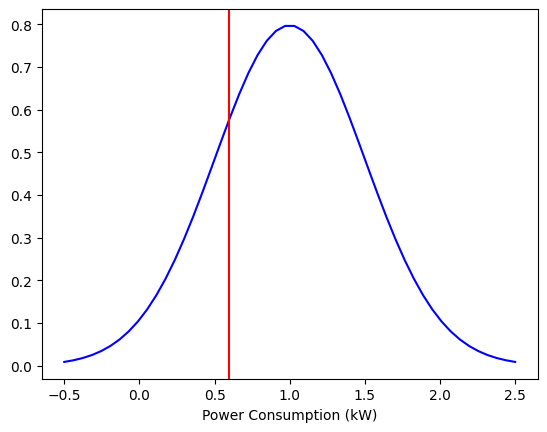

In [2]:
np.random.seed(1000)

# define parameters of the distribution
mu = 1
sigma = 0.5

# draw a random sample
sample = np.random.normal(mu, sigma, 1)
print('Sample = ' + str(sample))

# plot the sample and the distribution
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 50)
plt.plot(x,norm.pdf(x,mu,sigma),'b')
plt.axvline(x = sample,color='r')
plt.xlabel('Power Consumption (kW)')

plt.show()

During the day, the power consumption by a household typically varies due to changing load demands (e.g., usage patterns throughout the day). During this period, variations can result from factors like peak usage times or the cycling of large appliances. This means that we can take multiple measurements of power consumption over time. If we take another sample, we can model the two samples as being drawn from a bi-variate Gaussian distribution $\mathcal{N}(\mu, \Sigma)$, in which $\Sigma$ represents the covariance matrix, capturing the relationship between the two measurements and their joint variability.

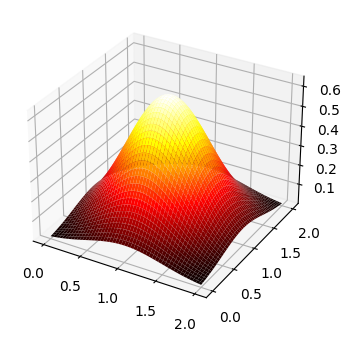

In [3]:
# We reuse the parameters of the original Gaussian prior
mu = 1
sigma = 0.5

# define parameters of the distribution
mu = np.array([mu,mu])
cov = np.array([[sigma**2, 0],
                [0,        sigma**2]])

# plot the joint distribution
X, Y = np.meshgrid(np.linspace(0, 2,200),np.linspace(0, 2,200))
grid_points = np.empty((200,200,2))
grid_points[:, :, 0] = X; 
grid_points[:, :, 1] = Y

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, multivariate_normal(mu, cov).pdf(grid_points),cmap='hot',linewidth=0)

plt.show()

If N samples are drawn, this can be modelled as a sample drawn from an N-variate Gaussian distribution. We can keep on drawing as much samples as we want up to infinity, leading to an infinite number of random variables. This is a Gaussian process: a collection of *random variables*, any finite number of which have a *joint Gaussian distribution*.

## Specifying a Gaussian process

A Gaussian process can be seen as a Gaussian distribution over functions. A Gaussian Process (GP) is fully specified by its:

- mean function $m(\mathbf{x})$, often assumed to be zero
- covariance function $k(\mathbf{x_1},\mathbf{x_2})$, the kernel function

As we haven't seen any training data yet, this is called the *GP prior* $GP\sim\mathcal{N}(m(\mathbf{x}), k(\mathbf{x_1},\mathbf{x_2}))$.

The kernel function determines how different observations inform one another, i.e., how similar or correlated are two observations. This means that samples that are close together will likely result in a similar value as it cannot drastically change from one measurement to the next.



A typical example of a kernel is the Squared Exponential kernel function:

$k(x_p,x_q) = \sigma^2 \exp(-\frac{1}{2l^2}(x_p-x_q)^2)$


This kernel function has two hyperparameters:

- $\sigma^2$ = signal variance
- $l$ = length scale

We will now implement this Squared Exponential kernel function. The first two arguments of the function are X1 and X2 which are respectively an MxD and NxD matrix of D-dimensional data points for which the similarity in kernel space has to be computed. The result is an MxN matrix with the kernel value for each X1[m,:]-X2[n,:] combination. The other arguments of the function are the kernel hyperparameters.

Some useful tips to understand the implementation:
- $||P-Q|| = \sqrt{||P||^2 + ||Q||^2 - 2P.Q}$
- with broadcasting, the implementation can be very efficient

In [4]:
def squared_exponential_kernel(X1, X2, l = 1.0, sigma_f = 1.0):
    squared_distance = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
    kernel_result = sigma_f**2 * np.exp(-0.5/l**2 * squared_distance)
    return kernel_result

It is now possible to draw samples from the GP prior. Every sample that is drawn represents a possible function.

To draw samples for the GP prior, we use the following algorithm:

- Choose a number of input points $X_*$
- Evaluate the covariance matrix K($X_*$,$X_*$)
- Draw a random Gaussian vector from $y_* \sim \mathcal{N}(0,K)$
- Plot the values of $y_*$ versus $X_*$

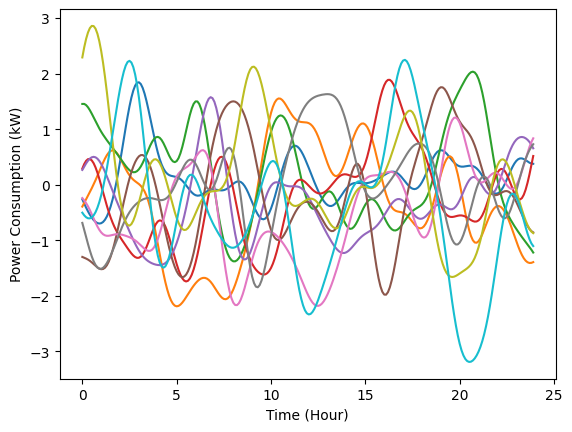

In [5]:
# generate a range of inputs at which to evaluate the function
X_star = np.arange(0, 24, 0.1).reshape(-1, 1)

# determine parameters of prior
mu = np.zeros(X_star.shape)
cov = squared_exponential_kernel(X_star, X_star)

# draw 10 samples from the prior
y_star = np.random.multivariate_normal(mu.ravel(), cov, 10)

# plot the samples
for i in range(10):
    plt.plot(X_star[:],y_star[i,:])
plt.xlabel('Time (Hour)')
plt.ylabel('Power Consumption (kW)')

plt.show()

Each of the samples represents one of the possible functions to be drawn from the Gaussian process. In our case, each line represents a possible power pattern given the current prior information.

Which of the following statements are correct?

- A: The kernel in this example is non-stationary.
- B: Combining kernel functions is not advised as it adds unnecessary complexity.
- C: The kernel hyperparameters can be set by using domain knowledge or by optimizing.
- D: Although the prior of the mean function is set to be zero, the GP can still model actual power consumption.

In [6]:
# Fill in your answer in the following variable, remove the error raise below.
answer_question_1 = 'cd'

In [7]:
########################### READ ONLY ###########################

To continue building our model, we need to make some observations of the data. These observations can then be used as anchor points of the Gaussian process.

We now define a power function:

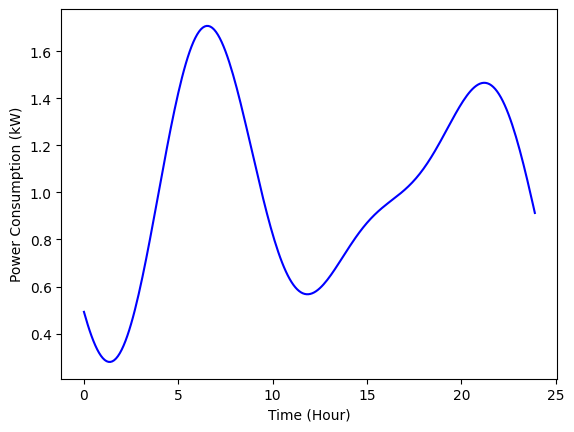

In [8]:
def power(time):
    return 0.5*np.sin(0.5*(time-4)) + 1 + 0.25*np.cos(0.75*(time-6))

plt.plot(X_star,power(X_star),'b')
plt.xlabel('Time (Hour)')
plt.ylabel('Power Consumption (kW)')

plt.show()

The graph above illustrates the variation in average power consumption throughout the day. Note that there are two peaks in the morning and the evening, which result from common household activities, such as cooking and cleaning, leading to the activation of large appliances during these times. We will now make some observations from this data for training our Gaussian process model:

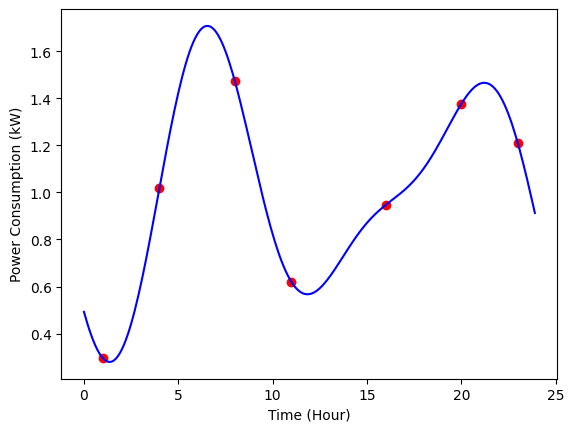

In [9]:
# make observations at these locations, DO NOT change this
X_train = np.array([1,4,8,11,16,20,23]).reshape(-1, 1)

# make the observations
y_train = power(X_train)

# plot the observations
plt.plot(X_star,power(X_star),'b')
plt.scatter(X_train,y_train,c='r')
plt.xlabel('Time (Hour)')
plt.ylabel('Power Consumption (kW)')

plt.show()

The above observations can be used to train the Gaussian process model. We define the *GP posterior* which computes the posterior $\mu$ and $\Sigma$ of our model, evaluated at locations $X_*$ after observing $X_{\text{train}}$ and $y_{\text{train}}$.

The function has the following parameters:

- $X_*$, the locations at which to evaluate the posterior
- $X_{\text{train}}$ and $y_{\text{train}}$, the training data
- *kernel_fnc*, a general kernel function
- *kernel_parameters*, a dictionary of all the hyperparameters of the specified kernel
- $\sigma_n$, the kernel noise hyperparameter

We define the following:

- $K = K(X_{\text{train}},X_{\text{train}})$
- $K_* = K(X_{\text{train}},X_*)$
- $K_{**} = K(X_*,X_*)$

Then, we can write:

- $\mu_* = K_*^T(K + \sigma_n^2I)^{-1}y_{\text{train}}$
- $\Sigma_* = K_{**} - K_*^T(K + \sigma_n^2I)^{-1}K_*$

To efficiently compute the inverse, we use the Cholesky decomposition $L$ of any matrix $A$ as follows:

$A^{-1} = (L^{-1})^T(L^{-1})$

This can be computed in Python using the np.linalg.cholesky function. The best performance is when using the $L$ matrix to solve a system of linear equations instead of computing the inverse. When solving the system $AX=B$ for $X$, we actually solve $X=A^{-1}B$. For clarity purposes, we will just use the inverse of the $L$ matrix.

In [10]:
def posterior(X_star, X_train, y_train, kernel_fnc, kernel_parameters = {}, sigma_n = 1e-5):
    
    K = kernel_fnc(X_train,X_train,**kernel_parameters)
    K_star = kernel_fnc(X_train,X_star,**kernel_parameters)
    K_star_star = kernel_fnc(X_star,X_star,**kernel_parameters)
    
    L = np.linalg.cholesky(K + sigma_n**2 * np.eye(K.shape[0]))
    L_inv = np.linalg.inv(L)
    
    mu_star = np.dot(np.dot(K_star.T,L_inv.T),np.dot(L_inv,y_train)).reshape((X_star.shape[0],))
    cov_star = K_star_star - np.dot(np.dot(K_star.T,L_inv.T),np.dot(L_inv,K_star))
    
    return mu_star, cov_star

Now we can compute the posterior distribution at test points $X_*$ and use this to draw new samples from our posterior.

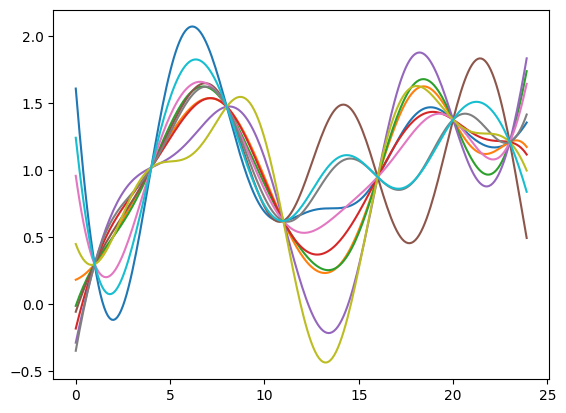

In [11]:
mu_star, cov_star = posterior(X_star,
                              X_train,
                              y_train,
                              squared_exponential_kernel,
                              {'l':4.0,'sigma_f':5.0})

# draw 10 samples from the posterior
y_star = np.random.multivariate_normal(mu_star.ravel(), cov_star, 10)
for i in range(10):
    plt.plot(X_star[:],y_star[i,:])

This lead to a very interesting plot. The lines show several samples of possible functions in the GP model. To visualise this further, we can use a typical visualisation method of Gaussian processes by showing the mean prediction and the 95% confidence interval.

In [12]:
# This function generates a plot of the Gaussian process, evaluated at X_star
# if num_samples > 0, random samples are drawn from the posterior distribution and plotted as well
def GPplot(X_star,X_train,y_train,mu_star,cov_star, num_samples = 0, ax = None):
    if ax is None:
        fig, ax = plt.subplots()
    
    # plot training data
    ax.plot(X_train,y_train,'rs',label=u'f(x)')
    
    # plot posterior mean
    ax.plot(X_star,mu_star,label=u'$\mu$')
    
    # plot confidence interval
    stdv = np.sqrt(np.diag(cov_star))
    ax.fill_between(X_star.flat, mu_star-2*stdv, mu_star+2*stdv, color="#DEF9FF",label='95% CI')
    
    for i in range(num_samples):
        ax.plot(X_star[:], np.random.multivariate_normal(mu_star.ravel(), cov_star, 1)[0,:],'--',label='posterior sample')
    
    # legend
    ax.legend(loc='best', framealpha=0.5)

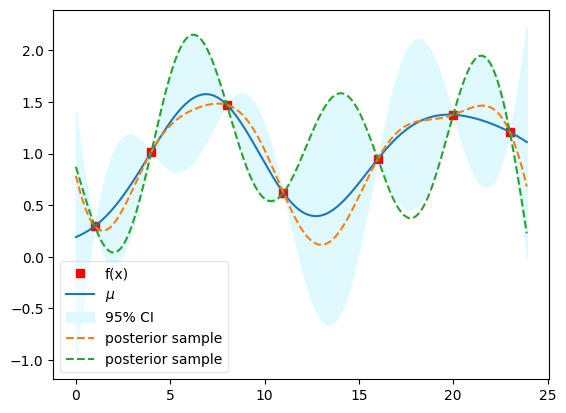

In [13]:
GPplot(X_star,X_train,y_train,mu_star,cov_star,num_samples=2)

The above figure visualise the Gaussian Process. We have now fit the GP model to our data points. Take a minute to try and understand the above plot yourself. What does the mean value mean? What does the confidence mean? Why is the confidence bound so large?

Which of the following statements are correct?

- A: The Gaussian Process always needs a large amount of data in order to create a good fit for the data.
- B: The Gaussian Process with an SE kernel can extrapolate data very well.
- C: Samples of the Gaussian Process will always lie within the confidence bound.
- D: None of the above.

In [14]:
answer_question_2 = 'd'

In [15]:
########################### READ ONLY ###########################

## Hyperparameters

As mentioned earlier, the kernel function has several hyperparamters. In the above example, we fixed the hyperparameters to a certain value. Now we will generate plots for several combinations of hyperparameters to analyse their influence.

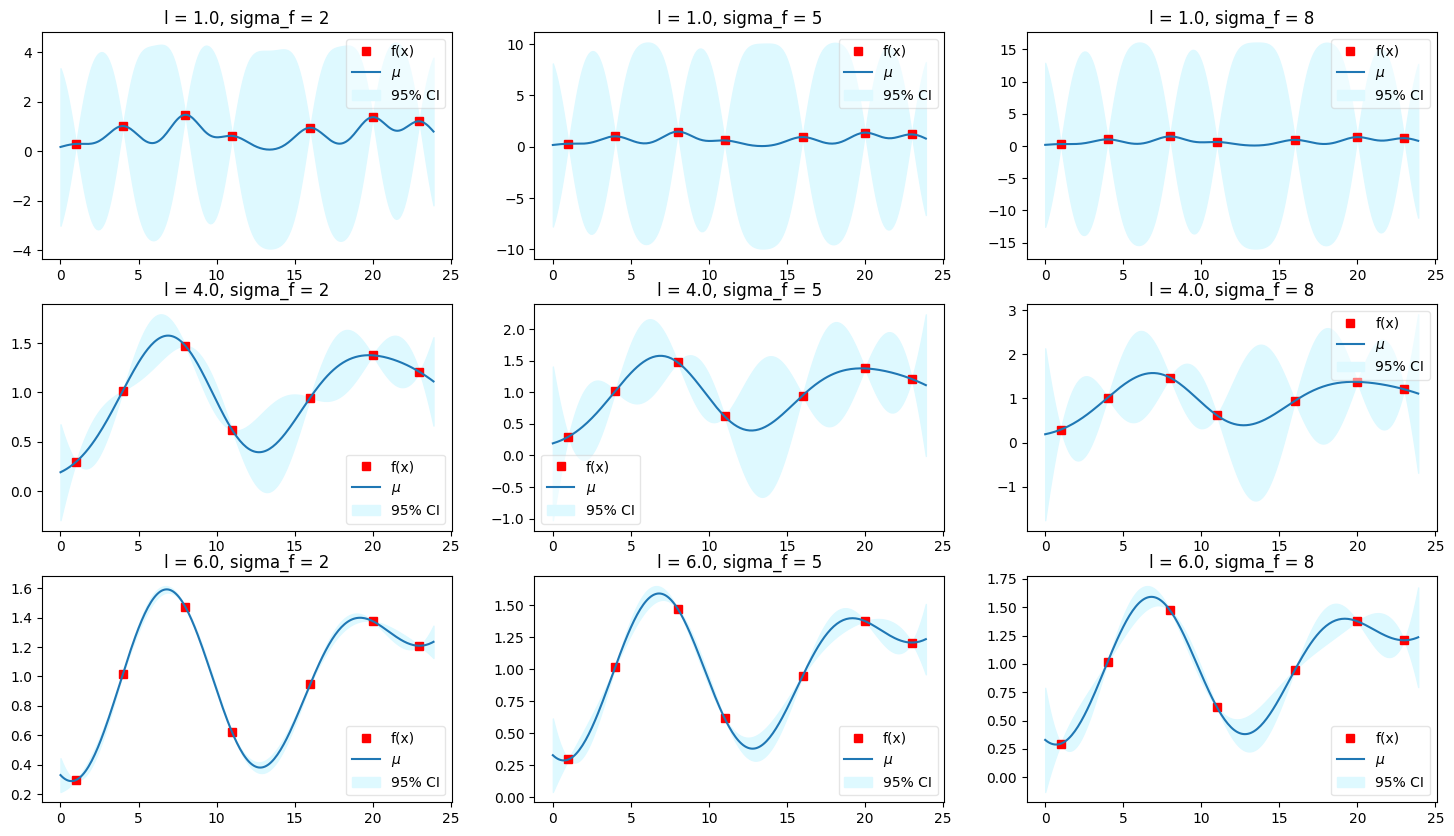

In [16]:
# range of the hyperparameters
lengthscale = [1.0,4.0, 6.0]
signal_variance = [2,5,8]

# create figure
f,axes = plt.subplots(len(lengthscale),len(signal_variance),figsize=(18, 10))

# plot each combination
for l_i, l in enumerate(lengthscale):
    for sigma_f_i, sigma_f  in enumerate(signal_variance):
        # compute the posterior distribution at X_star for each combination
        mu_star, cov_star = posterior(X_star,
                                      X_train, 
                                      y_train,
                                      squared_exponential_kernel, 
                                      {'l':l, 'sigma_f': sigma_f})
        # plot the GP
        GPplot(X_star,X_train,y_train,mu_star,cov_star,ax=axes[l_i,sigma_f_i])
        axes[l_i,sigma_f_i].set_title('l = ' + str(l) + ', sigma_f = ' + str(sigma_f))

Carefully examine the figures above to understand the influence of the hyperparameters on the model. Not everything is visible in the plots (see theory slides)!

Which of the following statements are correct?


- A: The kernel lengthscale parameter determines the influence of nearby input points.
- B: When the kernel lengthscale parameter is small, the function will be smoother and less 'wiggly'.
- C: The kernel variance parameter determines the average distance of your function away from its mean.
- D: The maximum uncertainty of the model is the same as the kernel variance parameter.

In [17]:
answer_question_3 = 'ac'

In [18]:
########################### READ ONLY ###########################

The hyperparameters can have a large influence on the model. Luckily, we can infer the parameter values form the data.

To do this, we optimize the Marginal Likelihood (log-likelihood):

$\log p(y_{\text{train}}|X_{\text{train}}) = - \frac{1}{2}y_{\text{train}}^T(K + \sigma_n^2I)^{-1}y_{\text{train}} - \frac{1}{2} \log |K + \sigma_n^2I| - \frac{N}{2} \log (2\pi)$

This log-likelihood needs to be maximized. As we will use the SciPy minimize function, we will minimize the negative-log-likelihood (NLL). The SciPy minimize function, minimizes a function $f(X)$ in which $X$ is a vector of parameters of the function. We will define a get_NegativeLogLikelihood function which generates a function $NegativeLogLikelihood(X)$ that computes the NLL for a specific combination of hyperparameters $X$.

Tip: |A| = sum(diag(L)), where L is the Cholesky decomposition of A.

In [19]:
def get_NegativeLogLikelihood(X_train,y_train, kernel_fnc, kernel_parameter_names):
    
    # define a function that only takes the hyperparameters as argument
    def NegativeLogLikelihood(parameters):
        
        kernel_parameters = {kernel_parameter_names[i]:parameters[i] for i in range(len(parameters))}
        
        sigma_n = kernel_parameters.pop('sigma_n', 1e-5)
            
        K = kernel_fnc(X_train,X_train,**kernel_parameters)
        
        L = np.linalg.cholesky(K + sigma_n**2 * np.eye(K.shape[0]))
        L_inv = np.linalg.inv(L)
        
        N = len(X_train)
        negativeLogLikelihood =  np.sum(0.5 * np.dot(np.dot(y_train.T,L_inv.T),np.dot(L_inv,y_train)) + 
                      np.log(np.diag(L)) + 
                      0.5 * N * np.log(2*np.pi))

        return negativeLogLikelihood
    
    # return the function
    return NegativeLogLikelihood

For the optimization procedure, we will use the SciPy minimize function. Note that the optimisation would be much better if we computed the gradients of the negative-log-likelihood. However, for this demo, we do not use it. By doing so, you can later on do somes tests with the code yourself without having to reimplement this, e.g. try different kernel functions for different data sets.

In [20]:
NLL = get_NegativeLogLikelihood(X_train, 
                                y_train,
                                squared_exponential_kernel,
                                ['l','sigma_f'])

optimisation_result = minimize(NLL, 
                               [1, 1], 
                               bounds=((1e-5, None), (1e-5, None)),
                               method='L-BFGS-B')

l_opt, sigma_f_opt = optimisation_result.x

print('Hyperparameter optimisation finished')
print('l_opt = ' + str(l_opt))
print('sigma_f_opt = ' + str(sigma_f_opt))

Hyperparameter optimisation finished
l_opt = 4.044316735697599
sigma_f_opt = 2.4339205998977693


The optimisation procedure resulted in a new set of hyperparameters. Let's plot the new GP with optimized hyperparameters.

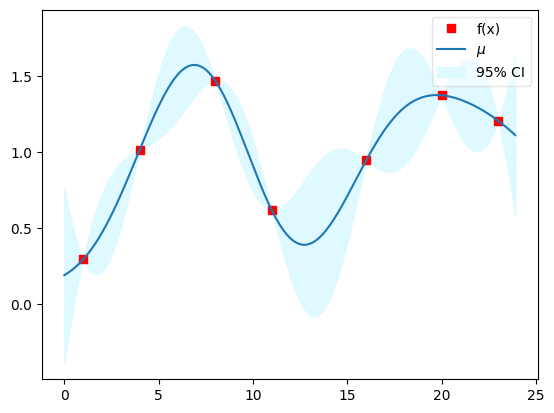

In [21]:
# If you get a RuntimeWarning when running this code cell, you can ignore it.
mu_star, cov_star = posterior(X_star,
                              X_train,
                              y_train,
                              squared_exponential_kernel,
                              {'l':l_opt, 'sigma_f': sigma_f_opt})

GPplot(X_star,X_train,y_train,mu_star,cov_star)

## Noisy observations

In the household power consumption example above, we implicitly assumed that all measurements were correct. In reality however, there is often some error on measurement. In following experiment, we will introduce some noise to the measurements and tell the Gaussian process optimisation method that there is a noise parameter to be optimised.

In [22]:
np.random.seed(1000)

# this defines the amount of noise
sigma = 0.1

X_train_noisy = np.array([1,3,5,7,8,9,11,16,20,23]).reshape(-1, 1)
y_train_noisy = power(X_train_noisy) + np.random.normal(0,sigma,len(X_train_noisy)).reshape((-1,1))

Let's get the optimal hyperparameters and plot the GP

In [23]:
np.random.seed(1000)

NLL = get_NegativeLogLikelihood(X_train_noisy, 
                                y_train_noisy,
                                squared_exponential_kernel,
                                ['l','sigma_f','sigma_n'])

optimisation_result = minimize(NLL, 
                               [1, 1, 1], 
                               bounds=((1e-5, None), (1e-5, None), (1e-5, None)),
                               method='L-BFGS-B')

l_opt, sigma_f_opt, sigma_n_opt = optimisation_result.x

print('Hyperparameter optimisation finished')
print('l_opt = ' + str(l_opt))
print('sigma_f_opt = ' + str(sigma_f_opt))
print('sigma_n_opt = ' + str(sigma_n_opt))

Hyperparameter optimisation finished
l_opt = 3.6904249455603253
sigma_f_opt = 2.9352337850057166
sigma_n_opt = 0.1805051239573514


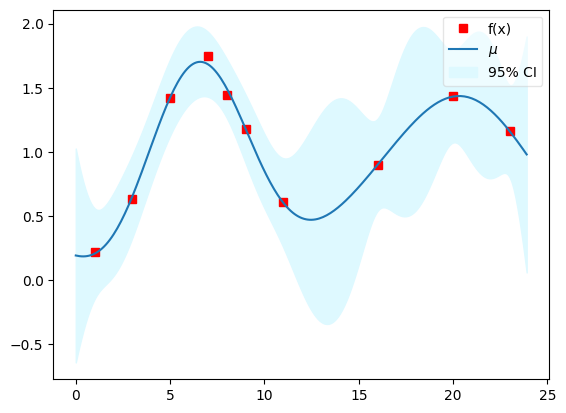

In [24]:
mu_star, cov_star = posterior(X_star,
                              X_train_noisy,
                              y_train_noisy,
                              squared_exponential_kernel,
                              {'l':l_opt, 'sigma_f': sigma_f_opt},
                              sigma_n = sigma_n_opt)

GPplot(X_star,X_train_noisy,y_train_noisy,mu_star,cov_star)

Carefully examine the above figure and think about how the Gaussian process optimised the hyperparameters.

Which of the following statements are correct?

- A: The Gaussian process correctly inferred the noise parameter because the relative error $\frac{|\sigma_n - \sigma^{opt}_n|}{\sigma_n}$ is less than 30%.
- B: As the volume of the training data increases, the measurement noise's variance defines a lower bound to the prediction's uncertainty.
- C: The estimation of the posterior mean is also influenced by the measurement noise.
- D: The signal variance, in this case, should be 0.1, and more data is needed to correctly estimate this parameter.

In [25]:
answer_question_4 = 'abc'

In [26]:
########################### READ ONLY ###########################

## Bayesian optimisation

Gaussian processes can also be used for finding the optimum of a target function. This method of optimisation is typically applied in cases when gathering an extra sample is expensive (e.g. due to computational requirements, time constraints, ...).

Gaussian process-based optimisation is a form of surrogate-based optimisation and Bayesian optimisation. To use this method, we use the following the algorithm:

- Gather data $f(X)$ at points $X$
- Approximate $f(X^*)$ using a GP
- Minimize a loss function and iteratively add data

First, we will define a nonlinear function to minimize.

In [27]:
def nonlinearfunction(x):
    return -(1.4 - 4 * x) * np.sin(18 * x) + np.cos(5 * x - 1)

In [28]:
# Define a range where we want to evaluate the GP
X_star = np.arange(0, 1.2, 0.01).reshape(-1, 1)

# Gather some samples f(X) at points X for training the GP
X_train = np.array([0.15,0.5,1.1]).reshape(-1, 1)
y_train = nonlinearfunction(X_train)

Let's use this training data to build and optimise a Gaussian process. We also plot the original target function to see how good the approximation of the GP is. Note that in reality, we do not know this target function. We only have the training data.

Hyperparameter optimisation finished
l_opt = 0.34897509957556905
sigma_f_opt = 2.4052478511361355


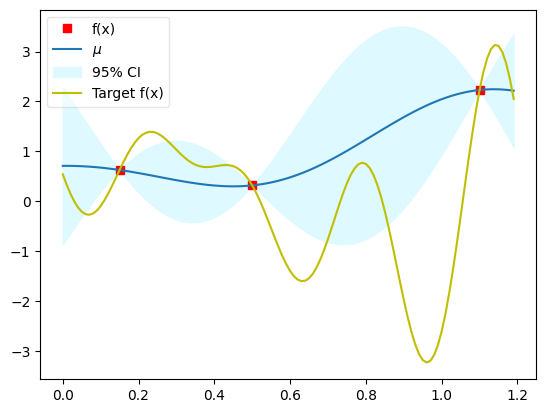

In [29]:
NLL = get_NegativeLogLikelihood(X_train, 
                                y_train,
                                squared_exponential_kernel,
                                ['l','sigma_f'])

optimisation_result = minimize(NLL, 
                               [0.1, 1], 
                               bounds=((1e-5, None), (1e-5, None)),
                               method='L-BFGS-B')

l_opt, sigma_f_opt = optimisation_result.x

print('Hyperparameter optimisation finished')
print('l_opt = ' + str(l_opt))
print('sigma_f_opt = ' + str(sigma_f_opt))

mu_star, cov_star = posterior(X_star,
                              X_train,
                              y_train,
                              squared_exponential_kernel,
                              {'l':l_opt,'sigma_f':sigma_f_opt})
GPplot(X_star,X_train,y_train,mu_star,cov_star)

plt.plot(X_star,nonlinearfunction(X_star),'y',label = 'Target f(x)')
ax = plt.gca()
ax.legend(loc='best', framealpha=0.5)
plt.show()

After collecting some data points, we have build our GP model. How can we use this GP to find the optimum of our target function? A simple method could be by just evaluating the GP at it's minimum. The reasoning behind this is that the currently collected data points will probably give some indication of the position of the real minimum.

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


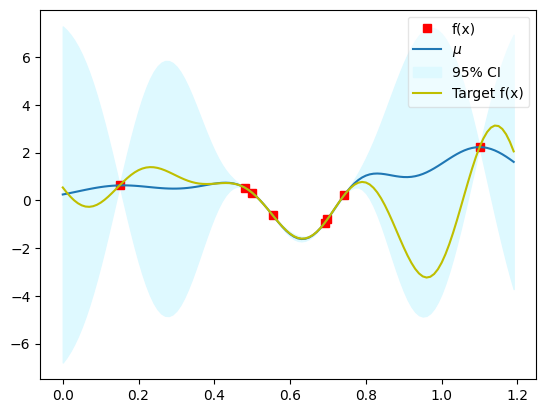

In [30]:
# take num_iter extra samples
num_iter = 5

i = 0

np.random.seed(1000)

# loop over the procudure of gathering extra samples
while i < num_iter:
    print('Iteration: ' + str(i))
    
    # generate 10 random candidate points. In reality, we could pick even more or solve this analytically
    X_candidate = np.random.uniform(0, 1, 10).reshape(-1, 1)
    
    # compute the posterior distribution at these candidate points 
    # for the GP with given training data and previously optimised hyperparameters.
    mu_star, cov_star = posterior(X_candidate,
                                  X_train,
                                  y_train,
                                  squared_exponential_kernel,
                                  {'l':l_opt,'sigma_f':sigma_f_opt})
    
    # compute the location of the minimum in the candidate points. We will use the minimum of the mean of the GP
    minimum_loc = np.argmin(mu_star)
    
    # gather this extra data point and extend the dataset
    X_train = np.concatenate((X_train,X_candidate[minimum_loc,:].reshape((-1,1))))
    y_eval = nonlinearfunction(X_candidate[minimum_loc,:]).reshape((-1,1))
    y_train = np.concatenate((y_train,y_eval))
    
    # compute the NLL function so that we can optimise our GP model with this new data
    NLL = get_NegativeLogLikelihood(X_train, 
                                    y_train,
                                    squared_exponential_kernel,
                                    ['l','sigma_f'])

    # perform the optimisation procedure
    optimisation_result = minimize(NLL, 
                                   [0.1, 1], 
                                   bounds=((1e-5, None), (1e-5, None)),
                                   method='L-BFGS-B')

    # get the optimimum to be used in the next iteration or the visualisation at the end
    l_opt, sigma_f_opt = optimisation_result.x

    # go to the next iteration
    i += 1
    
# compute the posterior distribution at X_star for visualisation purposes
mu_star, cov_star = posterior(X_star,
                              X_train,
                              y_train,
                              squared_exponential_kernel,
                              {'l':l_opt,'sigma_f':sigma_f_opt})

# plot the GP with the full set of data that has been gathered
GPplot(X_star,X_train,y_train,mu_star,cov_star)

# also plot the target function
plt.plot(X_star,nonlinearfunction(X_star),'y',label = 'Target f(x)')
ax = plt.gca()
ax.legend(loc='best', framealpha=0.5)
plt.show()

Take some time to interpret the above figure. Sampling at the mean location does not always lead to the optimum. A better way of gathering samples is by using a more complex loss function, also known as an infill criterion or acquisition function.

The theory slides provide us with an overview of some possible acquisition functions. The most commonly used are:

**Probability of Improvement (PoI):**

$P(y_* \leq f_{min}) = \int_{-\infty}^{f_{min}} \Phi(y|\mu_*,\Sigma_*)dy$

**Expected Improvement (EI):**

$\mathop{\mathbb{E}}[I] = (f_{min}-\mu_*)\Phi(f_{min})|\mu_*,\Sigma_*) + \Sigma_*\phi(f_{min}|\mu_*,\Sigma_*)$

In these equations, $\Phi$ represents the Cumulative Density Function and $\phi$ represents the Probability Density Function.

Let's implement the Expected Improvement criterion.

In [31]:
def compute_EI(mu_star,cov_star,y_train):
    min_y = np.min(y_train)
    s = np.sqrt(np.diag(cov_star))
    
    z = (min_y - mu_star) / s

    cdf = norm.cdf(z)
    pdf = norm.pdf(z)
    
    return (min_y - mu_star) * cdf + s * pdf

We will now plot the EI criterion for our initial set of samples.

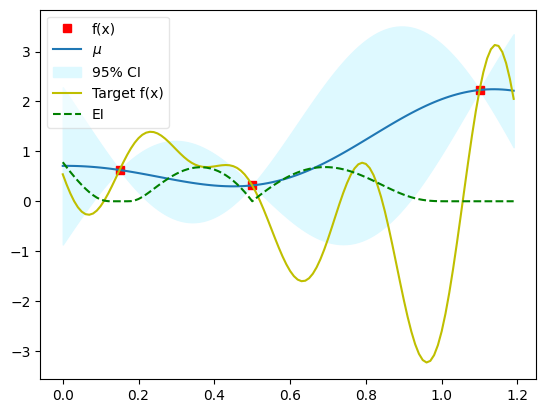

In [32]:
# Gather some samples f(X) at points X for training the GP
X_train = np.array([0.15,0.5,1.1]).reshape(-1, 1)
y_train = nonlinearfunction(X_train)

NLL = get_NegativeLogLikelihood(X_train, 
                                y_train,
                                squared_exponential_kernel,
                                ['l','sigma_f'])

optimisation_result = minimize(NLL, 
                               [0.1, 1], 
                               bounds=((1e-5, None), (1e-5, None)),
                               method='L-BFGS-B')

l_opt, sigma_f_opt = optimisation_result.x

mu_star, cov_star = posterior(X_star,
                              X_train,
                              y_train,
                              squared_exponential_kernel,
                              {'l':l_opt,'sigma_f':sigma_f_opt})

EI = compute_EI(mu_star,cov_star,y_train)

GPplot(X_star,X_train,y_train,mu_star,cov_star)

plt.plot(X_star,nonlinearfunction(X_star),'y',label = 'Target f(x)')
plt.plot(X_star,5*EI,'g--', label = 'EI')
ax = plt.gca()
ax.legend(loc='best', framealpha=0.5)
plt.show()

Now let's run some iterations of the algorithm using the Expected Improvement criterion.

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9


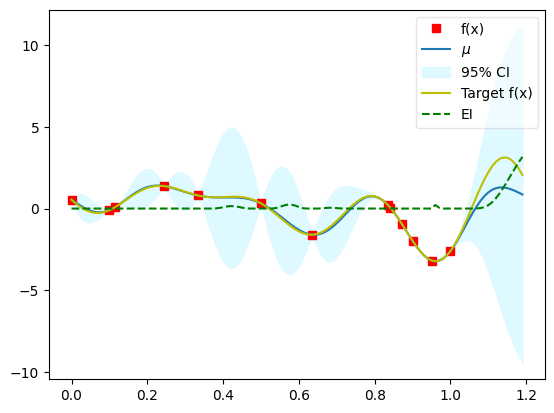

In [33]:
num_iter = 10

i = 0

X_train = np.array([0.1,0.5,0.9]).reshape(-1, 1)
y_train = nonlinearfunction(X_train)

np.random.seed(1000)

while i < num_iter:
    print('Iteration: ' + str(i))
    
    def eval_EI(X_candidate):
        X_candidate = X_candidate.reshape(-1,1)
        mu_star, cov_star = posterior(X_candidate,
                                      X_train,
                                      y_train,
                                      squared_exponential_kernel,
                                      {'l':l_opt,'sigma_f':sigma_f_opt})
        EI = compute_EI(mu_star,cov_star,y_train)
        return -1.0*EI

    # The expected improvement itself also needs to be optimized!
    EI_optimisation_result = minimize(eval_EI,
                                      list(np.random.uniform(0, 1, 1)),
                                      bounds=[(0,1)],
                                      method='L-BFGS-B')
    
    X_candidate = EI_optimisation_result.x
    
    X_train = np.concatenate((X_train,X_candidate.reshape((-1,1))))
    y_eval = nonlinearfunction(X_candidate).reshape((-1,1))
    y_train = np.concatenate((y_train,y_eval))
    
    NLL = get_NegativeLogLikelihood(X_train, 
                                    y_train,
                                    squared_exponential_kernel,
                                    ['l','sigma_f'])

    optimisation_result = minimize(NLL, 
                                   [0.1, 1], 
                                   bounds=((1e-5, None), (1e-5, None)),
                                   method='L-BFGS-B')

    l_opt, sigma_f_opt = optimisation_result.x
    
    i += 1
    
mu_star, cov_star = posterior(X_star,
                              X_train,
                              y_train,
                              squared_exponential_kernel,
                              {'l':l_opt,'sigma_f':sigma_f_opt})

EI = compute_EI(mu_star,cov_star,y_train)

GPplot(X_star,X_train,y_train,mu_star,cov_star)

plt.plot(X_star,nonlinearfunction(X_star),'y',label = 'Target f(x)')
plt.plot(X_star,5*EI,'g--', label = 'EI')
ax = plt.gca()
ax.legend(loc='best', framealpha=0.5)
plt.show()

Which of the following statements are correct?

- A: The acquisition function stops once the true minimum is reached.
- B: Evaluation of the Gausian Process posterior mean is more expensive than the evaluation of the acquistion function.
- C: Using an acquisition function we can iteratively sample.
- D: The exploration is driven by the Gaussian Process variance, while the posterior mean is used to exploit an area of interest.


In [34]:
answer_question_5 = 'bcd'

In [35]:
########################### READ ONLY ###########################

Finally, consider the following statements: which of the following statements are correct?

- A: The prior functions of the SE kernel have infinitely many derivatives.
- B: By optimising the marginal likelihood, there is an automatic balance between model fitting and model complexity.
- C: Given a data set for training, the GP model selects a subset of this data set to use for training.
- D: Gaussian Processes are parametric models.


In [36]:
answer_question_6 = 'ab'

In [37]:
########################### READ ONLY ###########################

## Open questions

In this practicum we illustrated that a (Vanilla) GP is able to fit a nonlinear function. However, there are also some limitations to GPs. List those limitations and give examples of applications where GPs will fail as models. (give at least 3 bullet points, max 10 lines)

Gaussian Processes have limitations that can make them unsuitable for certain types of applications. First, they suffer from high computational complexity, scaling as 
O(n^3), where n is the number of data points. This computational demand becomes prohibitive for large datasets, such as those found in real-time IoT sensor networks or social media analysis, which often involve millions of data points. As a result, GPs are impractical in scenarios that require real-time or rapid analysis. Second, the effectiveness of GPs heavily depends on the choice of the kernel function. A poorly chosen or overly simplistic kernel may fail to capture the complexities and nuances of the data, leading to inaccurate predictions. For instance, capturing seasonal patterns or complex non-linear relationships in time series data becomes challenging if the kernel does not adequately reflect the underlying data structure. Furthermore, GPs are highly sensitive to noise in the data. If the data contains significant noise or if the noise parameter is not well-optimized, the predictions can be significantly distorted, resulting in unreliable outcomes. This sensitivity makes them less effective in applications like financial markets, where high volatility and outliers are common, or in environments where sensor measurements are subject to errors or considerable variability.

Despite the fact that GPs have some limitations, there are numerous cases where GPs are preferred. Give at least three reasons why a GP should be chosen instead of another ML model (that we have seen in the course). (max 10 lines)

Despite their limitations, Gaussian Processes offer advantages that make them highly suitable for specific scenarios. First, they naturally provide uncertainty quantification in their predictions, which is crucial in applications where understanding the confidence in predictions is essential. This is particularly valuable in fields like medical diagnostics, where decisions based on predictions must be made cautiously, or in risk assessment for financial investments, where the level of uncertainty directly influences decisions. Second, GPs are well-suited for small datasets because they are non-parametric models that rely directly on the data to make predictions. This means they can effectively capture patterns even when data is limited, unlike parametric models, which may suffer from overfitting or underfitting in the absence of sufficient data. Additionally, GPs offer a high degree of flexibility through the use of customizable kernel functions. These kernels allow users to incorporate prior knowledge or assumptions about the data, such as periodic patterns in energy consumption, linear trends in scientific experiments, or spatial relationships in geographic data. This flexibility makes GPs particularly valuable in scientific modeling and other domains where precision, adaptability, and the ability to incorporate domain expertise are critical. By combining uncertainty quantification, robustness with small datasets, and kernel customization, GPs become an indispensable tool for problems that require high accuracy and interpretability.

## Other resources

In this lab session, we have learned the basics of Gaussian processes. With this basic implementation, you can gain additional insights into the inner workings. To use GP's in the future, there are many Python packages available to quickly build a Gaussian process model without having to worry about the implementation optimisations. Some examples are:

- GPFlow - https://github.com/GPflow/GPflow
- GPy - https://github.com/SheffieldML/GPy
- sklearn - https://scikit-learn.org/

Bayesian optimisation using Gaussian processes can be done using the following packages:

- Trieste - https://github.com/secondmind-labs/trieste
- Botorch - https://github.com/pytorch/botorch
- GPFlowOpt - https://github.com/GPflow/GPflowOpt
- GPyOpt - https://github.com/SheffieldML/GPyOpt
- skopt - https://scikit-optimize.github.io/stable/

These packages also allow you to experiment with more advanced Gaussian process models such as:

- Sparse Gaussian processes
- Gaussian process Latent Variable Models (GP-LVM)
- Deep Gaussian processes - https://github.com/secondmind-labs/GPflux